In [61]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [62]:
# read image into standard 2-d numpy array
data = astropy.io.fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
# show the image
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

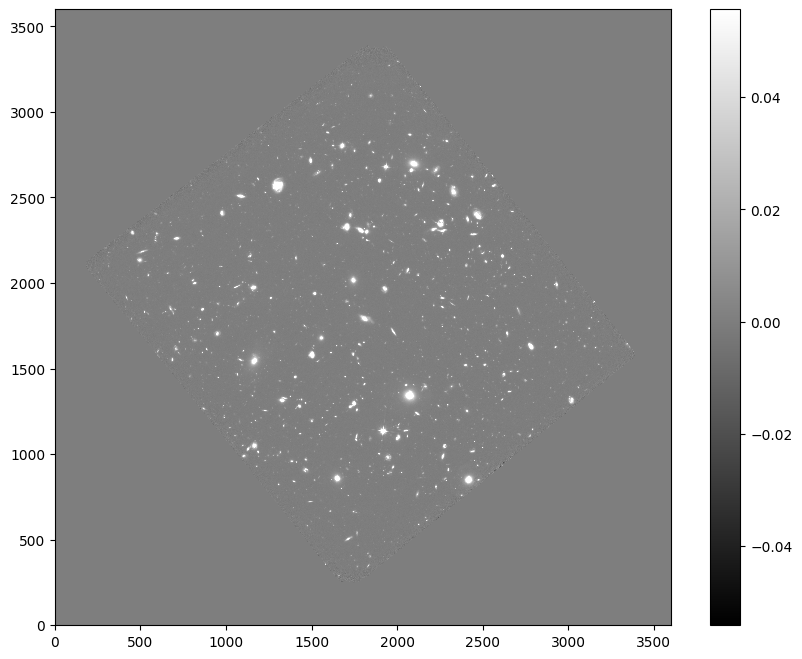

In [63]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [64]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [65]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


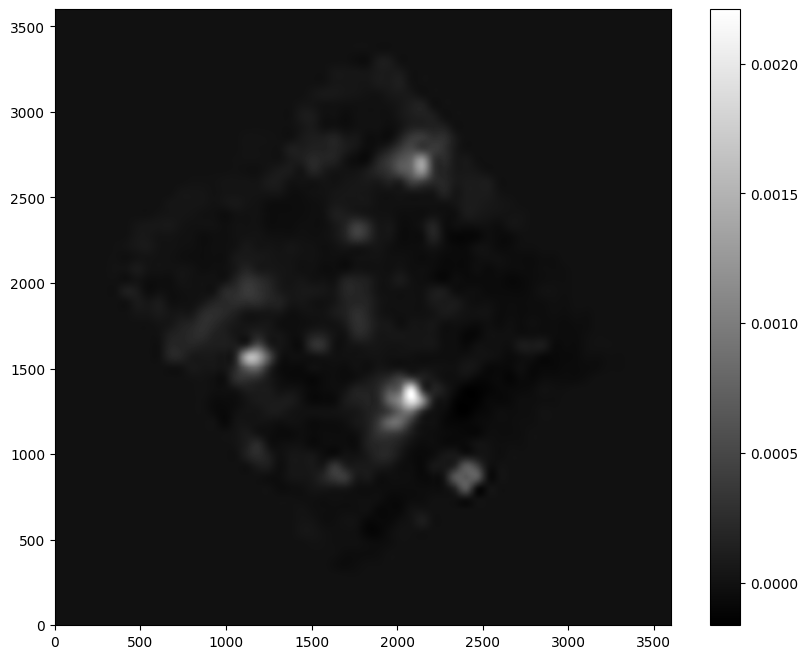

In [66]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

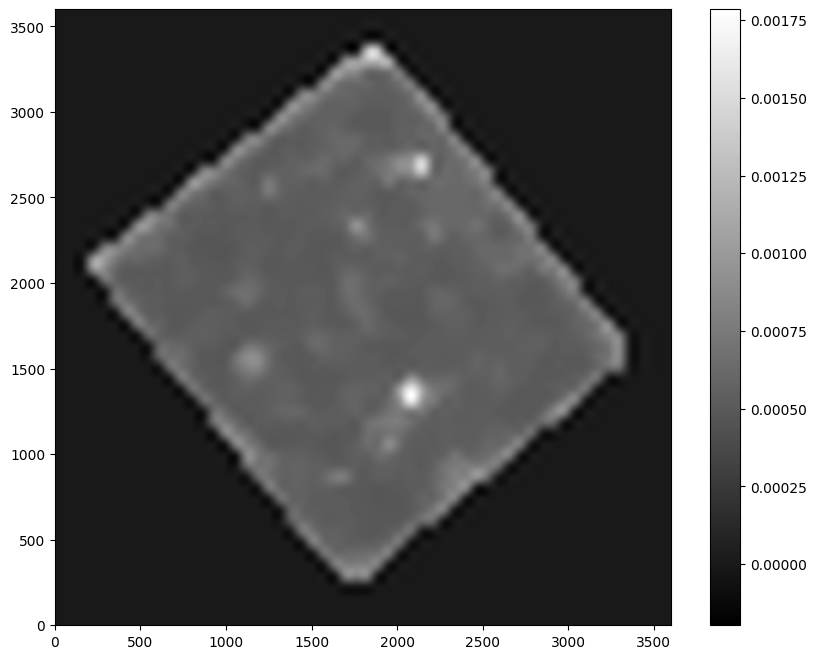

In [67]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();


In [68]:
# subtract the background
data_sub = data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)


In [28]:
# how many objects were detected
len(objects)

8646

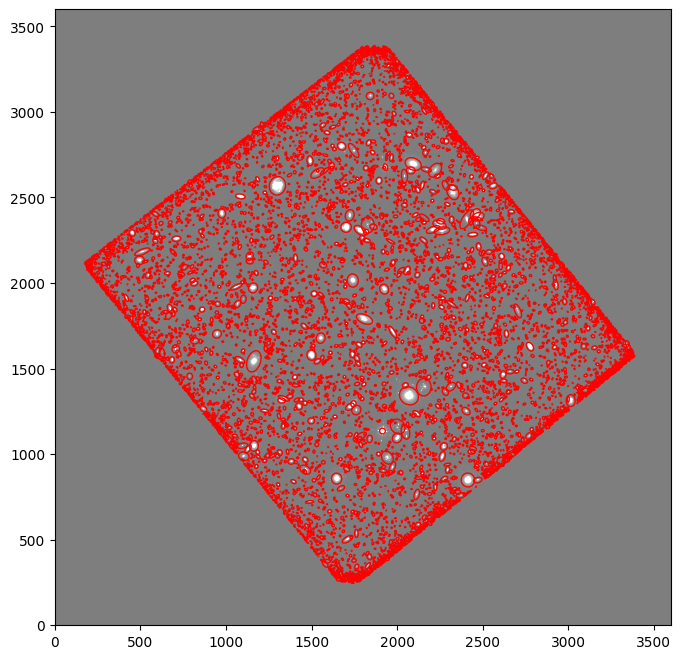

In [29]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [30]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [31]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


/var/folders/2l/xjhgx4l936d90ddqmx9rv_480000gn/T/ipykernel_20123/723590037.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(flux), bins = 100)


(array([  1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   3.,   1.,   1.,
          3.,   3.,   4.,   6.,   7.,   7.,   8.,   7.,  10.,  10.,  12.,
         17.,  16.,  27.,  44.,  48.,  63.,  78., 132., 208., 314., 452.,
        590., 737., 782., 701., 567., 502., 418., 333., 250., 214., 206.,
        190., 154., 157., 119., 107., 112.,  96.,  87.,  78.,  64.,  47.,
         56.,  53.,  56.,  44.,  33.,  32.,  21.,  29.,  29.,  22.,  20.,
         13.,  10.,  11.,  11.,   8.,   7.,   2.,   0.,   1.,   0.,   2.,
          1.,   3.,   1.,   2.,   1.,   2.,   1.,   1.,   3.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.07816913, -4.0083171 , -3.93846508, -3.86861305, -3.79876102,
        -3.728909  , -3.65905697, -3.58920495, -3.51935292, -3.44950089,
        -3.37964887, -3.30979684, -3.23994481, -3.17009279, -3.10024076,
        -3.03038874, -2.96053671, -2.89068468, -2.82083266, -2.75098063,
        -2.6811286 , -2.61

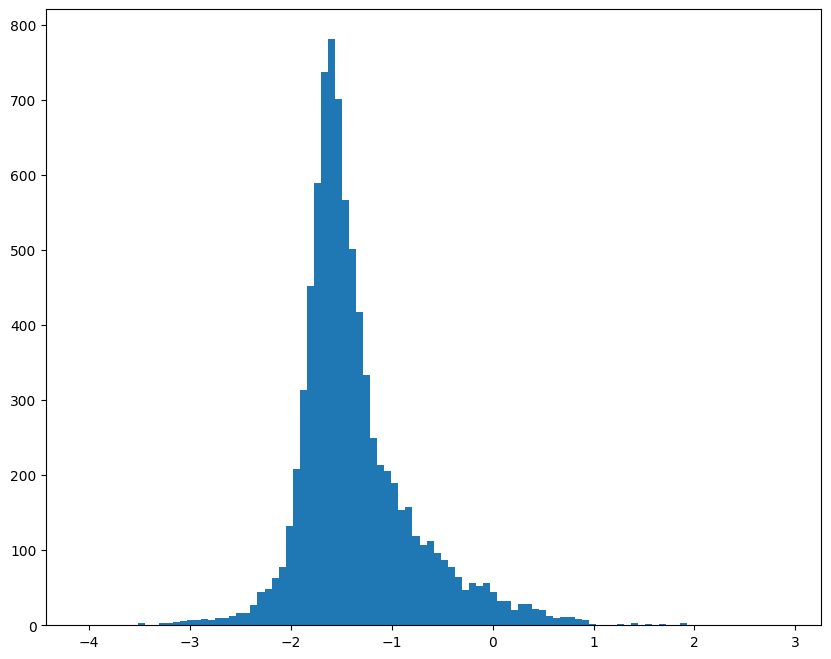

In [53]:
plt.hist(np.log10(flux), bins = 100)

In [80]:
flux_array = np.array(flux)
flux_mean = np.mean(flux_array)
flux_std = np.std(flux_array)

new = flux_array - flux_mean
np.argmax(new)

2064

In [74]:
index = np.where((-2.5*np.log10(flux)<1))[0]
print(len(index))

621


/var/folders/2l/xjhgx4l936d90ddqmx9rv_480000gn/T/ipykernel_20123/927379300.py:1: RuntimeWarning: invalid value encountered in log10
  index = np.where((-2.5*np.log10(flux)<1))[0]


In [75]:
np.where(new==2064)

(array([], dtype=int64),)

In [78]:
outlier = new[2064]

806.9356881823958

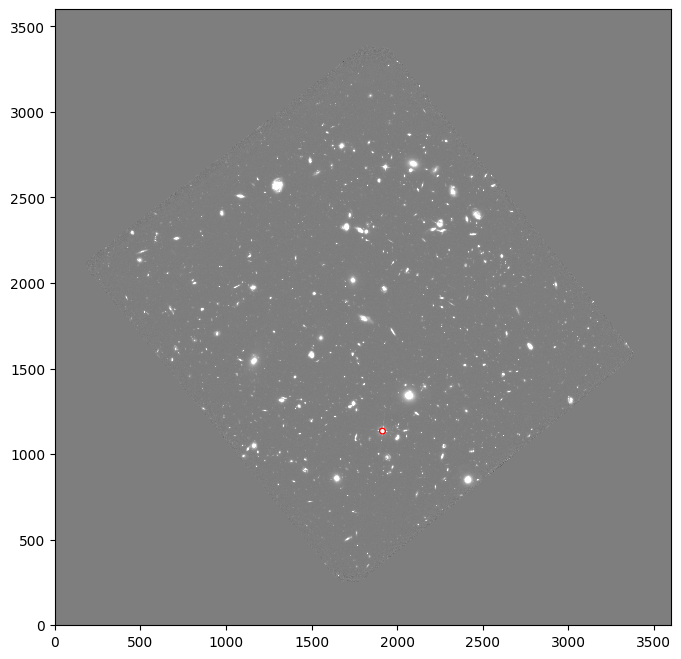

In [82]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
e = Ellipse(xy=(objects['x'][2064], objects['y'][2064]),
            width=6*objects['a'][2064],
            height=6*objects['b'][2064],
            angle=objects['theta'][2064] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)

In [87]:
print("The flux value of the outlier is", flux_array[2064])

The flux value of the outlier is 807.2972835731507


In [88]:
std_away_mean = (flux_array[2064]-flux_mean)/flux_std
print("It is", std_away_mean, "standard deviations away from mean")

It is 87.32803365197564 standard deviations away from mean


Making a 3 color image

In [89]:
data_125 = astropy.io.fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
data_160 = astropy.io.fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

In [93]:
def rescale_image(data):
    pdata_tmp = data.copy( )
    m = np. nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10 (vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10 (pdata_tmp)
    return pdata_tmp, vpmin, vpmax

def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure (figsize=(fnx, fny))
    pdata_tmp, vpmin, vpmax = rescale_image (data)
    plt. imshow (pdata_tmp, vmin=vpmin, vnax=vpmax)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001192092896].


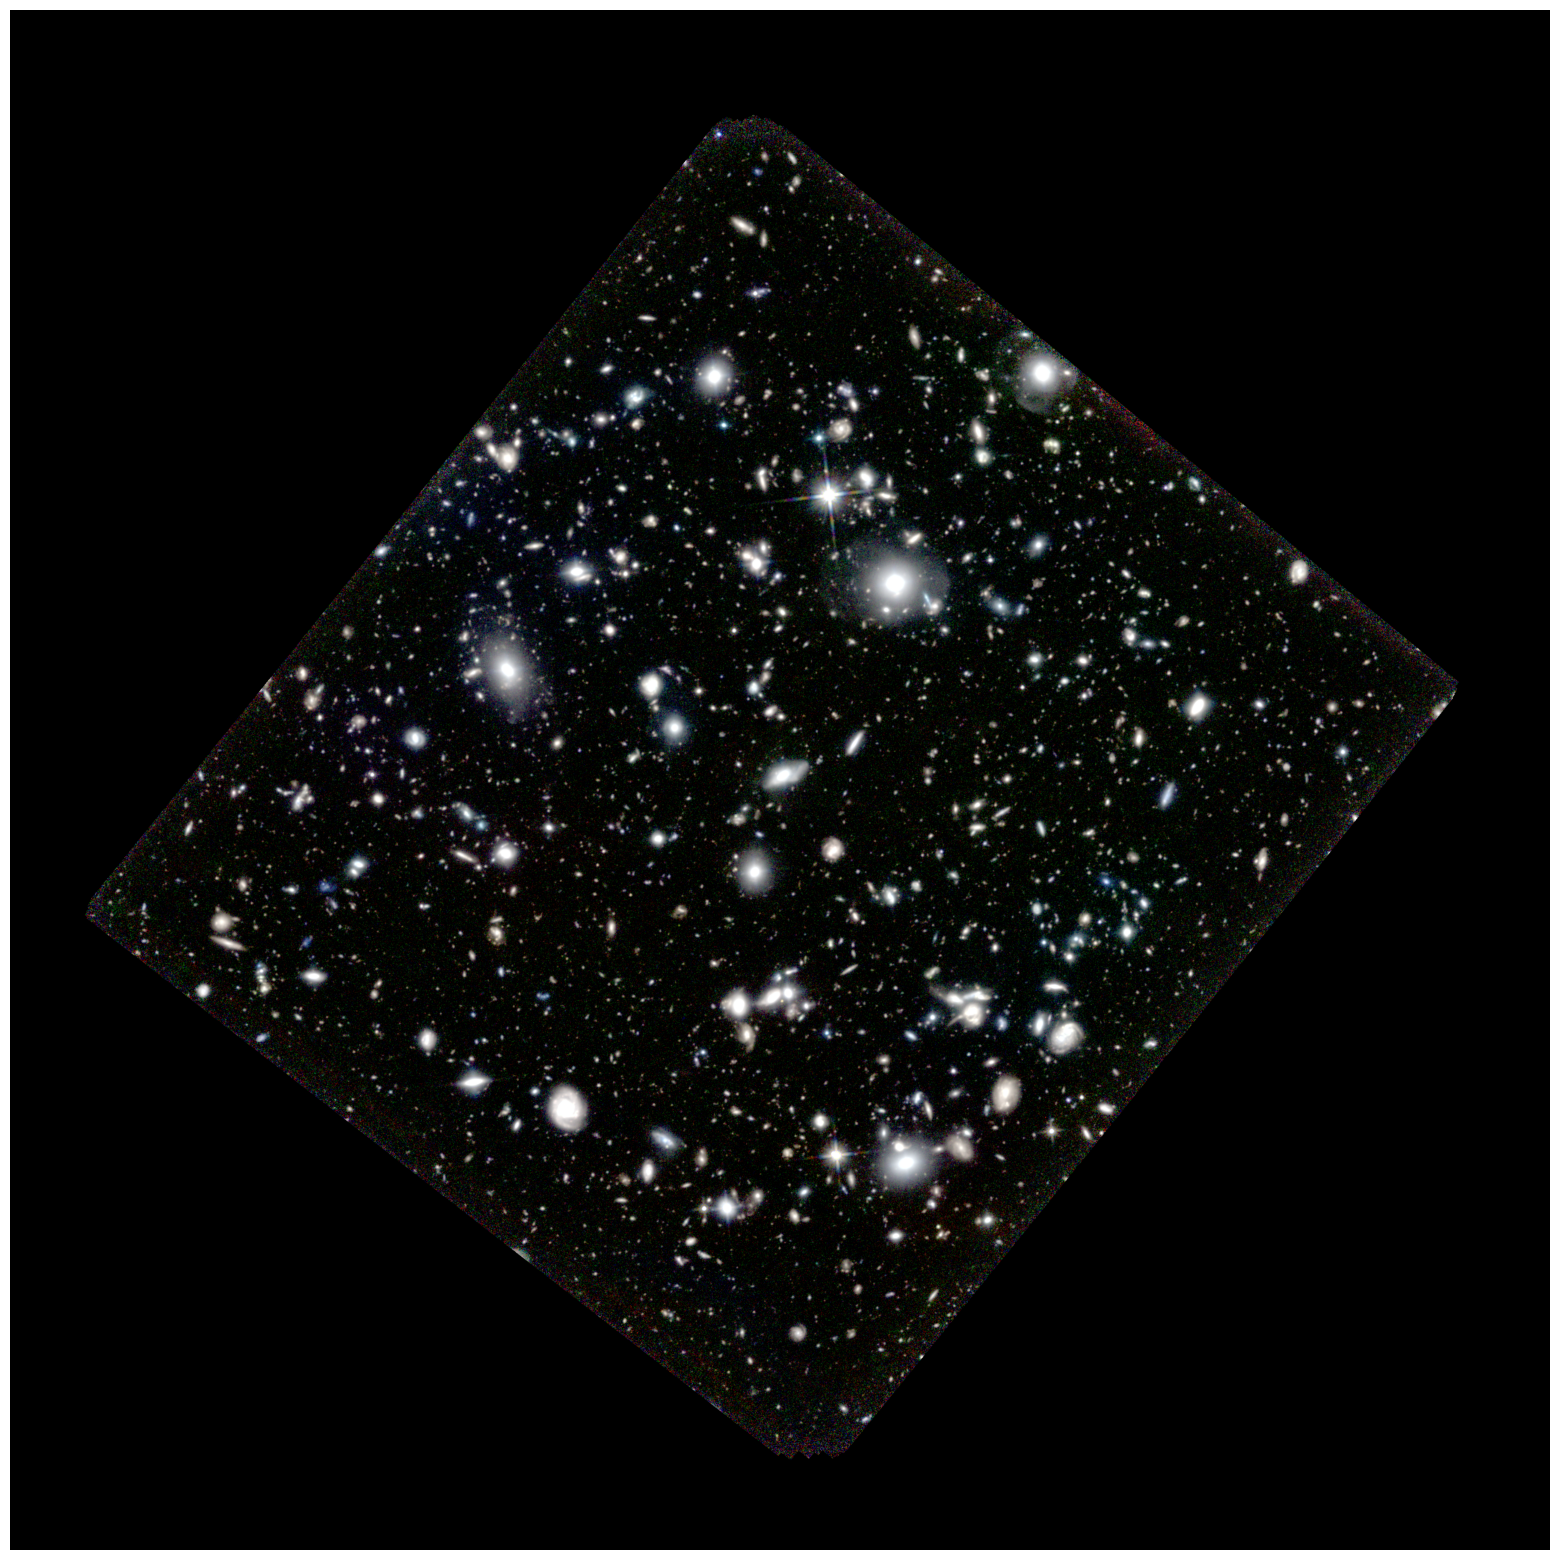

In [96]:
# data_2 is equivalent to data 
# data_3 is equivalent to data_125 
# data_4 is equivalent to data_160 


data_2_res, d2min, d2max = rescale_image(data)
data_3_res, d3min, d3max = rescale_image(data_125)
data_4_res, d4min, d4max = rescale_image(data_160)

data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d2min]= d3min
data_3_res[data_3_res>d2max]= d3max
data_4_res[data_4_res<d2min] = d4min
data_4_res[data_4_res>d2max]= d4max


rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:, 0] = (data_2_res-d2min) / (d2max-d2min)
rgb[:,:, 1] = (data_3_res-d3min) / (d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min) / (d4max-d4min)

f, ax = plt. subplots (1,1, figsize=(20,20))
ax.axis( 'off')
ax.imshow (rgb)
plt.savefig("3-color image.png")